# Import libraries

In [32]:
# ===== Packages =====
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ===== User Defined Packages =====
import titanic_helpers as th

%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = True

sns.set_theme(style="darkgrid")


# EDA - Exploratory Data Analysis
## In this section:
* Loading the data and sneak peeking it
* Check what data types exist in the dataset
* Get some statistics estimators from the data
* Check for missing values
* Plot some distributions
* Check for correlation between the features and also between the features and the target

In [2]:
df = pd.read_csv('Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## We can see there are 891 records and 12 field: 11 predictors and 1 target (Survived)
## For convience we'll move the Survived field to the right hand of the table:

In [3]:
col_list = list(df.columns)
col_list[1], col_list[-1] = col_list[-1], col_list[1]
df = df.reindex(columns=col_list)

In [4]:
df.head()

,PassengerId,Embarked,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,1,S,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,S,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


## Some overview on the different features (just the not obvious ones):
* Embarked - Port of Embarktion (C = Cherbourg, Q = Queenstown, S = Southampton)
* Pclass - Ticket Class (1st classs, 2nd class...)
* SobSp - Number of siblings / spouses aboard the Titanic
* Parch - Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - The price of the ticket
* Cabin - Cabin number


## Get some info about the data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Embarked     889 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Use value counts on each feature to understand it more:

In [6]:
th.value_counts_all(df)

----------------------------------------PassengerId---------------------------------------- - 

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

----------------------------------------Embarked---------------------------------------- - 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

----------------------------------------Pclass---------------------------------------- - 

3    491
1    216
2    184
Name: Pclass, dtype: int64

----------------------------------------Name---------------------------------------- - 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnso

## Some inresting insights from value_counts (and also from df.info()):
* PassengerID gives us no information probably wil be dropped.
* Embarked and Pclass are categorial variables with cardinality of 3.
* Name as it is gives us no useful information but it might be interesting to use the status (Miss, Mr) of the passengers as a new feature.
* Sex is a categorial variable with cardinality of 2.
* Age is a continuous variable with 177 null values out of 891 records.
* SibSp and Parch are categorial variables with cardinality of 7.
* For now it seems Ticket gives us no useful information (needs to be checked more thoroughly).
* Fare is a continuous variable.
* Cabin has 684 miss values and also has many different bins (and I'm sure that there are many more unkowns bins to us), so might be dropped.
* Survived is a categorial variable with cardinality of 2.



## Plot features and target distributions:

### Plot Pr(Surveived) and countplot of survived

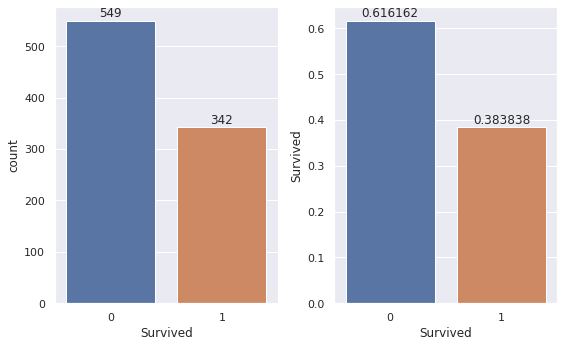

In [53]:
#titanic = sns.load_dataset("titanic")
fig = plt.figure(figsize=(8.,5.))
ax = fig.add_subplot(1,2,1)
ax = sns.countplot(x="Survived", data=df)
ax.bar_label(ax.containers[0], padding=1)

ax = fig.add_subplot(1,2,2)
ax = sns.barplot(x="Survived", y='Survived',data=df, estimator=lambda x: len(x) / len(df))
ax.bar_label(ax.containers[0], padding=1)

fig.tight_layout()

### We can see that the data is pretty balanced

### Plot the categorial features: (Embarked, Pclass, Sex, SibSp, Parch)
* Pr(feature) for detecting rare labels and biased features
* Barplot for the ditribution Pr(Survived|Feature)

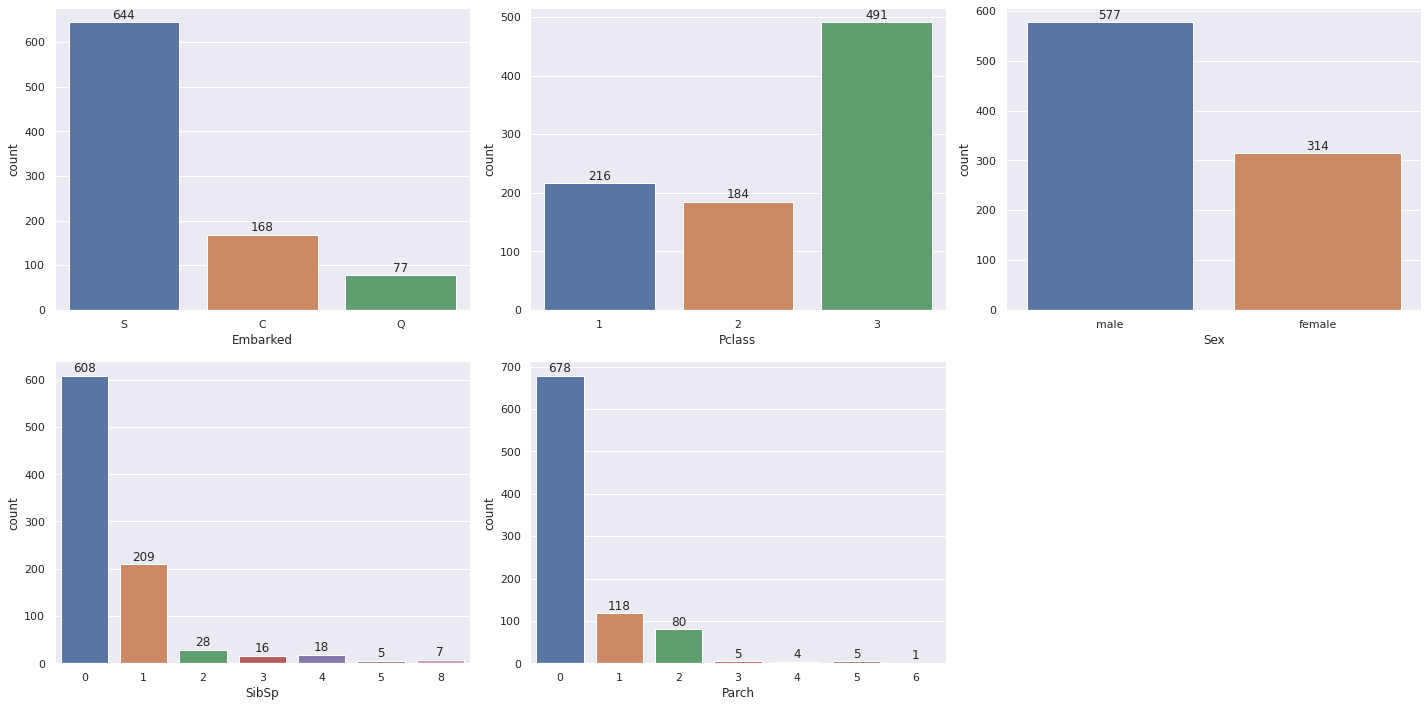

In [57]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(x=col,data=df)
    ax.bar_label(ax.containers[0], padding=1)
    
    
fig.tight_layout()

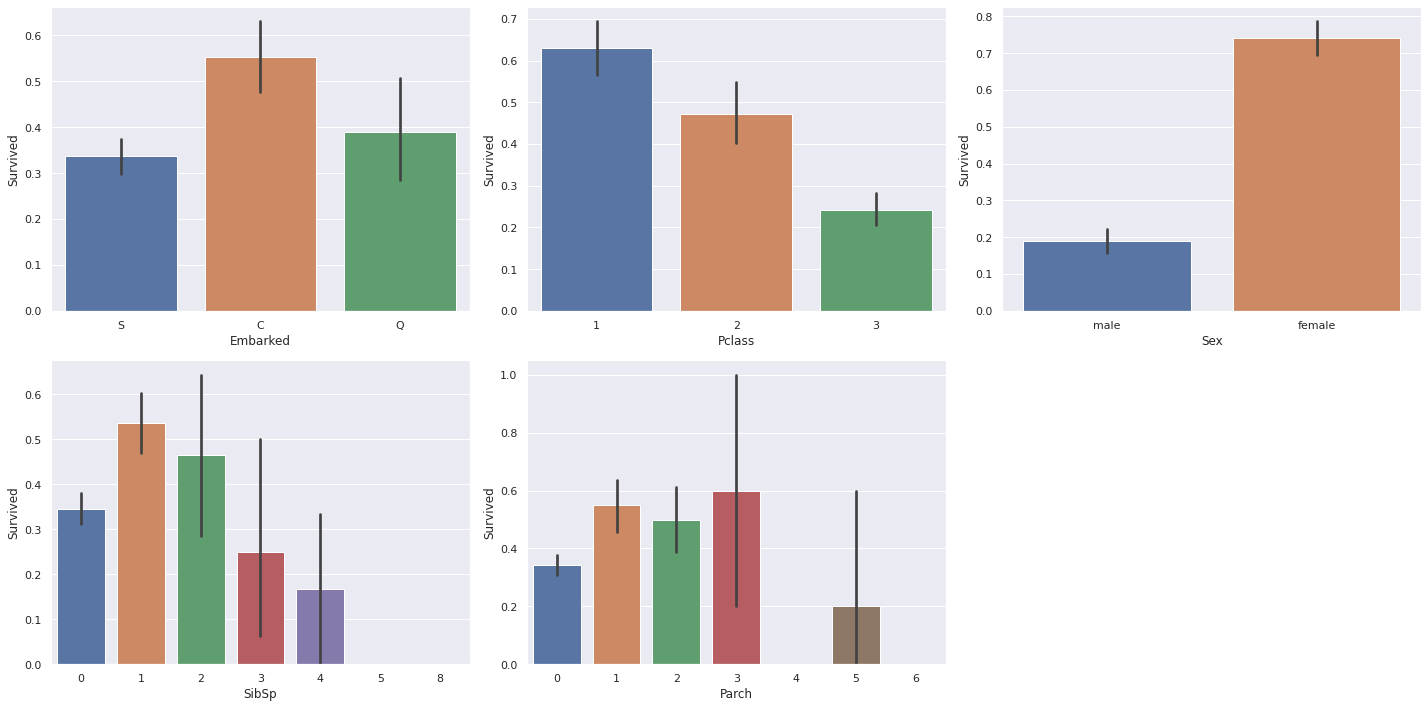

In [55]:
cols_to_plot = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Parch']
fig = plt.figure(figsize=(20.,10.))
for i, col in enumerate(cols_to_plot):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.barplot(x=col, y='Survived',data=df)
    
    
fig.tight_layout()

# Plot the 